In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [1]:
from sklearn.utils import shuffle
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
from sklearn.utils import shuffle
import numpy as np
from numpy import genfromtxt
X=np.zeros((847,1,8000))
Y=np.zeros((847,2))


for i in range(847):
  my_data = genfromtxt("C:/Users/dianu/Downloads/SM/SM_Gen/SM"+str(i+1)+".csv", delimiter=',')
  my_data2 = genfromtxt("C:/Users/dianu/Downloads/SMy/SM_id_Gen/SMy"+str(i+1)+".csv", delimiter=',')
  X[i,0,:]=my_data
  Y[i,:]=my_data2

In [5]:
X, Y = shuffle(X, Y)

In [6]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)

# Train

X_train = X[:split_train, [0],:]; y_train=Y[:split_train, :]

# Valid

X_valid = X[split_train:split_valid, [0],:]; y_valid=Y[split_train:split_valid,:]

# Test

X_test = X[split_valid:, [0],:]; y_test=Y[split_valid:,:]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(592, 1, 8000) (592, 2)
(170, 1, 8000) (170, 2)
(85, 1, 8000) (85, 2)


In [2]:
# Deep GRU


model = Sequential()


model.add(GRU(128, return_sequences=True, input_shape=(1,8000)))
model.add(GRU(128, return_sequences=True))
model.add(GRU(128, return_sequences=True))
model.add(GRU(128))
model.add(Dense(2))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 128)            3121920   
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 128)            99072     
_________________________________________________________________
gru_2 (GRU)                  (None, 1, 128)            99072     
_________________________________________________________________
gru_3 (GRU)                  (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 3,419,394
Trainable params: 3,419,394
Non-trainable params: 0
_________________________________________________________________


In [7]:

optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])

history=model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2,validation_data=(X_valid, y_valid))

Epoch 1/100
592/592 - 33s - loss: 1.7059 - acc: 0.8091 - val_loss: 0.7732 - val_acc: 0.8706
Epoch 2/100
592/592 - 6s - loss: 0.9114 - acc: 0.8497 - val_loss: 0.9018 - val_acc: 0.8412
Epoch 3/100
592/592 - 6s - loss: 0.8448 - acc: 0.8480 - val_loss: 0.7952 - val_acc: 0.8882
Epoch 4/100
592/592 - 6s - loss: 0.7506 - acc: 0.8547 - val_loss: 0.7965 - val_acc: 0.8294
Epoch 5/100
592/592 - 6s - loss: 0.6936 - acc: 0.8649 - val_loss: 0.6710 - val_acc: 0.9000
Epoch 6/100
592/592 - 6s - loss: 0.6603 - acc: 0.8834 - val_loss: 0.5630 - val_acc: 0.9118
Epoch 7/100
592/592 - 6s - loss: 0.6079 - acc: 0.8784 - val_loss: 0.5313 - val_acc: 0.8647
Epoch 8/100
592/592 - 6s - loss: 0.5596 - acc: 0.9071 - val_loss: 0.4336 - val_acc: 0.9294
Epoch 9/100
592/592 - 6s - loss: 0.4697 - acc: 0.9088 - val_loss: 0.4709 - val_acc: 0.9235
Epoch 10/100
592/592 - 6s - loss: 0.4309 - acc: 0.8970 - val_loss: 0.4080 - val_acc: 0.9118
Epoch 11/100
592/592 - 6s - loss: 0.3889 - acc: 0.9155 - val_loss: 0.4065 - val_acc: 0.9

592/592 - 6s - loss: 0.1067 - acc: 0.9527 - val_loss: 0.3051 - val_acc: 0.9118
Epoch 91/100
592/592 - 6s - loss: 0.1053 - acc: 0.9493 - val_loss: 0.2115 - val_acc: 0.9647
Epoch 92/100
592/592 - 6s - loss: 0.1045 - acc: 0.9628 - val_loss: 0.2582 - val_acc: 0.9294
Epoch 93/100
592/592 - 6s - loss: 0.1349 - acc: 0.9426 - val_loss: 0.2557 - val_acc: 0.9471
Epoch 94/100
592/592 - 6s - loss: 0.1089 - acc: 0.9595 - val_loss: 0.2091 - val_acc: 0.9412
Epoch 95/100
592/592 - 6s - loss: 0.1159 - acc: 0.9527 - val_loss: 0.2130 - val_acc: 0.9471
Epoch 96/100
592/592 - 6s - loss: 0.1092 - acc: 0.9544 - val_loss: 0.2610 - val_acc: 0.9294
Epoch 97/100
592/592 - 6s - loss: 0.1102 - acc: 0.9578 - val_loss: 0.2725 - val_acc: 0.9235
Epoch 98/100
592/592 - 6s - loss: 0.1579 - acc: 0.9493 - val_loss: 0.2696 - val_acc: 0.9412
Epoch 99/100
592/592 - 6s - loss: 0.1029 - acc: 0.9578 - val_loss: 0.2608 - val_acc: 0.9294
Epoch 100/100
592/592 - 6s - loss: 0.0937 - acc: 0.9544 - val_loss: 0.2553 - val_acc: 0.9588


Text(0.5, 1.0, 'Training and validation loss')

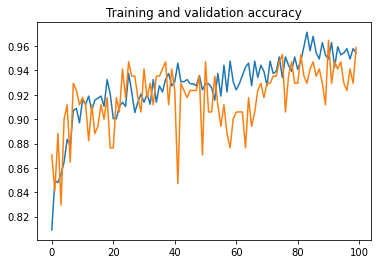

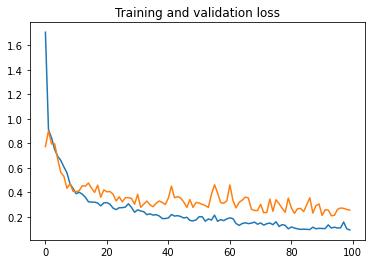

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [9]:
y_predictim=model.predict(X_test)

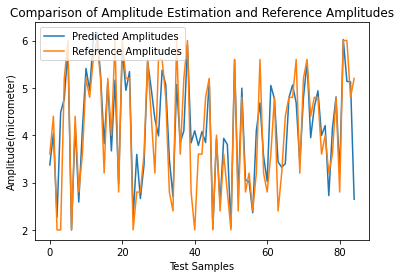

In [10]:
plt.plot(y_predictim[:,0],label="Predicted Amplitudes")
plt.plot(y_test[:,0],label="Reference Amplitudes")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(micrometer)')
plt.title('Comparison of Amplitude Estimation and Reference Amplitudes')
plt.show()

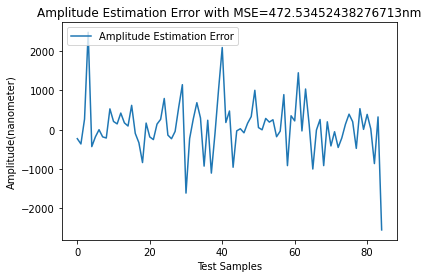

In [11]:
plt.plot(1000*(y_predictim[:,0]-y_test[:,0]),label="Amplitude Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(nanometer)')
plt.title('Amplitude Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,0], y_test[:,0]))+'nm')
plt.show()

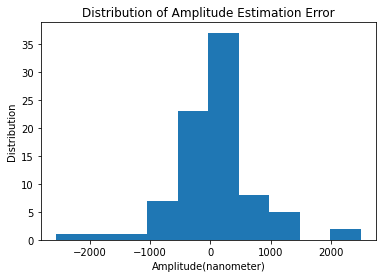

In [12]:
plt.hist(1000*(y_predictim[:,0]-y_test[:,0]), bins = 10)
plt.xlabel('Amplitude(nanometer)')
plt.ylabel('Distribution')
plt.title('Distribution of Amplitude Estimation Error')
plt.show()

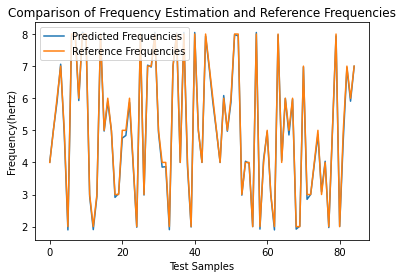

In [13]:
plt.plot(y_predictim[:,1],label="Predicted Frequencies")
plt.plot(y_test[:,1],label="Reference Frequencies")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(hertz)')
plt.title('Comparison of Frequency Estimation and Reference Frequencies')
plt.show()

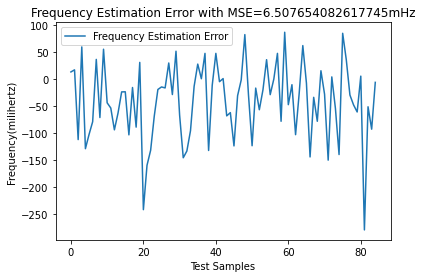

In [14]:
plt.plot(1000*(y_predictim[:,1]-y_test[:,1]),label="Frequency Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(milihertz)')
plt.title('Frequency Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,1], y_test[:,1]))+'mHz')
plt.show()

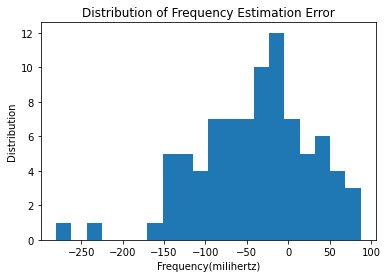

In [15]:
plt.hist(1000*(y_predictim[:,1]-y_test[:,1]), bins = 20)
plt.xlabel('Frequency(milihertz)')
plt.ylabel('Distribution')
plt.title('Distribution of Frequency Estimation Error')
plt.show()